## **Random Forest**

### **Import necessary libraries**

In [1]:
import os 
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

### **Prepare train, test data**

In [2]:
train_df = pd.read_csv('../data/train_data.csv')
test_df = pd.read_csv('../data/test_data.csv')

In [3]:
X_train = train_df.drop(columns=['diabetes'])
y_train = train_df['diabetes']
X_test = test_df.drop(columns=['diabetes'])
y_test = test_df['diabetes']

### **Initialize model**

In [4]:
model = RandomForestClassifier(random_state=42)

In [5]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
y_pred = model.predict(X_test)

In [7]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], shape=(19994,))

Accuracy:  0.9717915374612384
Recall:  0.6764705882352942
Precision:  0.9879725085910653
F1 Score:  0.803072625698324


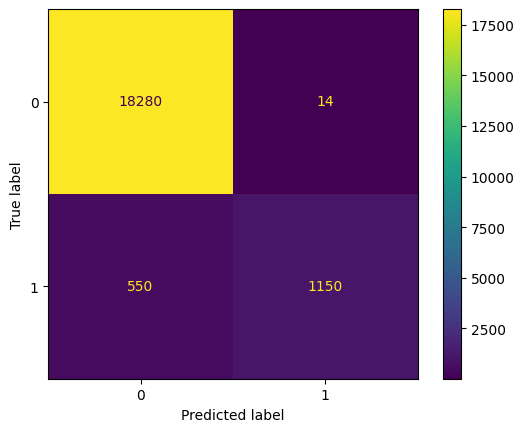

In [8]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### **Fine-tune hyperparameters**

In [9]:
finetuned_model = RandomForestClassifier(random_state=42)

In [10]:
# params_grid = {
#     "criterion": ["gini"],
#     "n_estimators": [100],
#     "max_depth": [None, 10, 20, 30],
#     "min_samples_split": [2, 5],
#     "min_samples_leaf": [2, 5],
#     "max_features": ["sqrt", "log2", None],
#     "class_weight": [None, "balanced"],
# }

# grid = GridSearchCV(finetuned_model, params_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
# grid.fit(X_train, y_train)

In [11]:
# print("Best parameters:", grid.best_params_)
# print("Best CV score:", grid.best_score_)

We found the best prams is `{'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}`

In [12]:
best_model = RandomForestClassifier(
    class_weight=None,
    criterion='gini',
    max_depth=12,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42,
)

In [13]:
best_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,12
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
best_y_pred = best_model.predict(X_test)

Accuracy:  0.9724917475242573
Recall:  0.6829411764705883
Precision:  0.9906143344709898
F1 Score:  0.8084958217270195


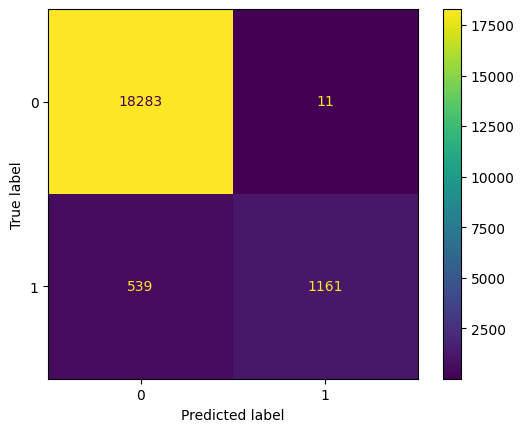

In [15]:
print("Accuracy: ", accuracy_score(y_test, best_y_pred))
print("Recall: ", recall_score(y_test, best_y_pred))
print("Precision: ", precision_score(y_test, best_y_pred))
print("F1 Score: ", f1_score(y_test, best_y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, best_y_pred)).plot()